<a href="https://colab.research.google.com/github/phyuphyuthaw/portfolio-ML-AI/blob/main/FuelConsumptionLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression

## Objectives

After completing this lab you will be able to:

*   Use scikit-learn to implement simple Linear Regression
*   Create a model, train it, test it and use the model


In [ ]:
#Import packages
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

In [ ]:
#link to google drive to load dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import csv
file_path = '/content/drive/MyDrive/Colab Notebooks/data/FuelConsumption.csv'

In [ ]:
#Read the data
df = pd.read_csv(file_path)

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
#Data Summarization
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [ ]:
#Data Exploration
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


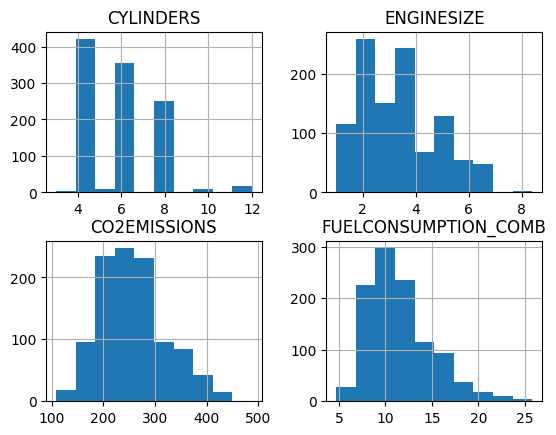

In [ ]:
#Visualize in plot
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

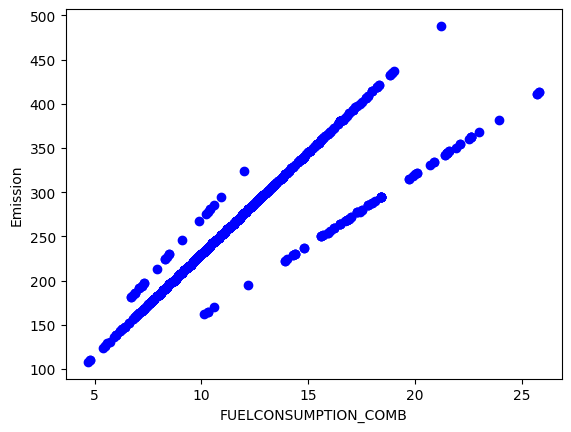

In [ ]:
#Each feature against CO2Emission
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color="blue")
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

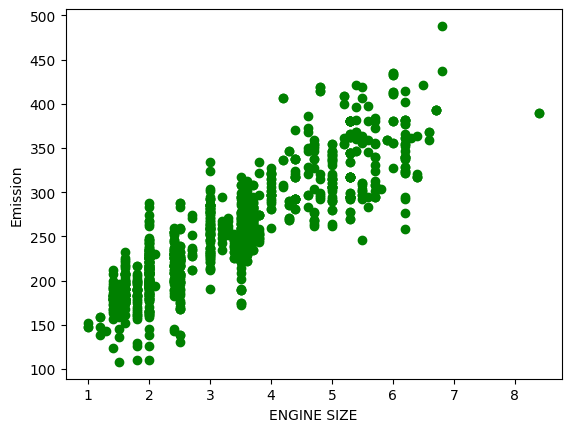

In [ ]:
#Engine size vs Emission
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="green")
plt.xlabel("ENGINE SIZE")
plt.ylabel("Emission")
plt.show()

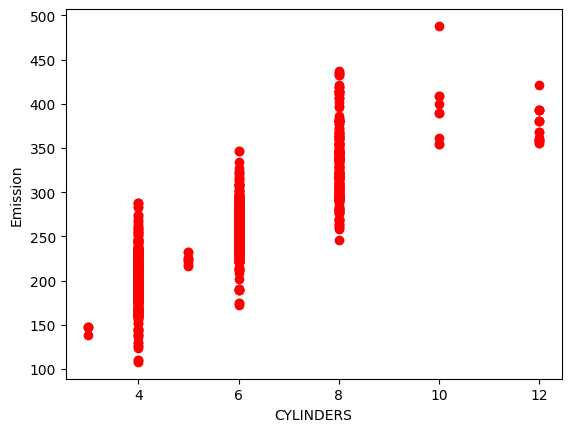

In [ ]:
#Cylinder Vs Emission
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color="red")
plt.xlabel("CYLINDERS")
plt.ylabel("Emission")
plt.show()

In [ ]:
#Creating training and testing dataset
#split the dataset into 80% train data and 20% test data

X = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']].values
y = df['CO2EMISSIONS'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=1)

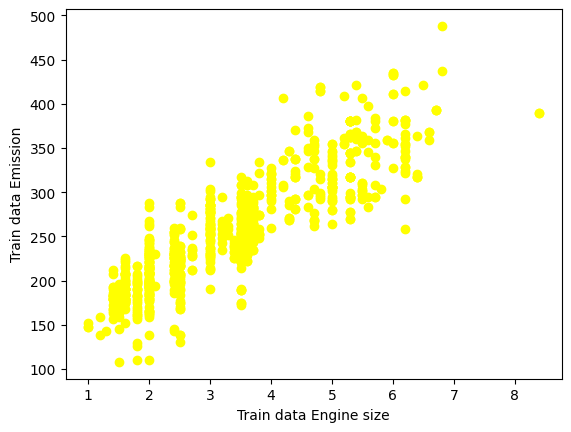

In [ ]:
#Train data distribution
plt.scatter(X_train[:,0], y_train, color="yellow")
plt.xlabel("Train data Engine size")
plt.ylabel("Train data Emission")
plt.show()

In [ ]:
#Implementing the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train[:,0].reshape(-1, 1), y_train)

#Checking the coefficients
print('Coefficients: ',model.coef_)
print('Intercept: ',model.intercept_)

Coefficients:  [39.4153746]
Intercept:  124.77059523158408


Text(0, 0.5, 'Emission')

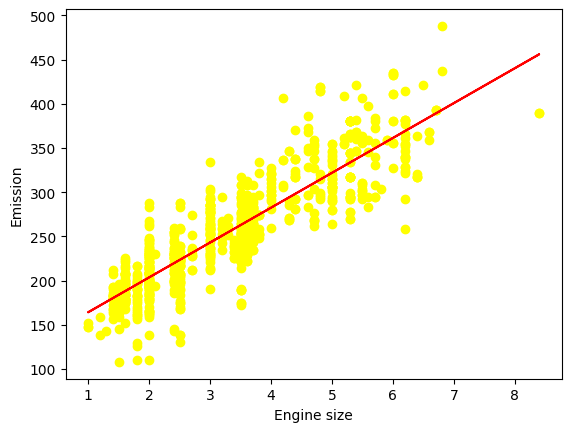

In [ ]:
#plot the fit line over the data
plt.scatter(X_train[:,0], y_train, color="yellow")
plt.plot(X_train[:,0], model.predict(X_train[:,0].reshape(-1,1)), '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [ ]:
#Evaluate the model with test dataset
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

test_x = X_test[:,0].reshape(-1,1)
y_pred = model.predict(test_x)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred, squared = True)
r2 = r2_score(y_test, y_pred)
print("Mean absolute error: %.2f" %mae)
print("Mean squared error: %.2f" %mse)
print("R2-score: %.2f" %r2)

Mean absolute error: 23.21
Mean squared error: 955.37
R2-score: 0.76


Coefficients:  [39.4153746]
Intercept:  124.77059523158408
Mean absolute error: 20.50
Mean squared error: 857.80
R2-score: 0.79


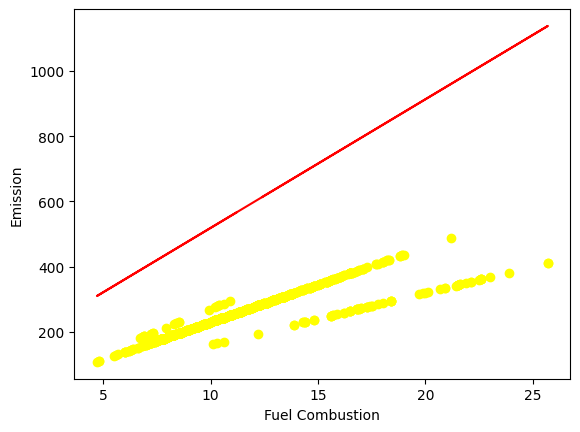

In [ ]:
#Fuel Combustion vs Emission

#Implementing the fuel combustion model
fuel_model = LinearRegression()
fuel_model.fit(X_train[:,2].reshape(-1, 1), y_train)

#Checking the coefficients
print('Coefficients: ',model.coef_)
print('Intercept: ',model.intercept_)

#plot the fit line over the data
plt.scatter(X_train[:,2], y_train, color="yellow")
plt.plot(X_train[:,2], model.predict(X_train[:,2].reshape(-1,1)), '-r')
plt.xlabel("Fuel Combustion")
plt.ylabel("Emission")

#Evaluation
test_x = X_test[:,2].reshape(-1,1)
y_pred = fuel_model.predict(test_x)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred, squared = True)
r2 = r2_score(y_test, y_pred)
print("Mean absolute error: %.2f" %mae)
print("Mean squared error: %.2f" %mse)
print("R2-score: %.2f" %r2)